In [22]:
import numpy as np
import matplotlib.pyplot as plt
import cmath
import math
from IPython.display import Image
import pandas as pd
import random

In [34]:


class Fressnel:
    def __init__(self):
        self.theta = np.linspace(0,90,500)
        self.theta_i = np.radians(self.theta)

        
    def set_n_i(self,n_i):
        self.n_i = n_i
        
    def set_n_t(self,n_t):
        self.n_t = n_t
        
    def get_n_i(self):
        return self.n_i
    
    def get_n_t(self):
        return self.n_t

    def transmittance(self):
        self.theta_t = []
        max_index = 0
        for i in range(len(self.theta_i)):
            transmittance_sin = (self.n_i/self.n_t)*cmath.sin(self.theta_i[i])
            if cmath.isclose(transmittance_sin.real, 1.0) or cmath.isclose(transmittance_sin.real, -1.0):
                transmittance = cmath.pi/2.0 * cmath.copysign(1, transmittance_sin.real)
            else:
                transmittance = cmath.asin(transmittance_sin)
            self.theta_t.append(transmittance)
            self.max_index = i
            if transmittance.imag != 0:
                break
        return self.theta_t, self.max_index, transmittance_sin

    def r_perp(self):
        self.r_perp_arr = []
        self.t_perp_arr = []
        theta_t = self.transmittance()[0]
        for i in range(self.max_index):
            r_perp_num = self.n_i*np.cos(self.theta_i[i])-n_t*np.cos(self.theta_t[i])
            r_perp_den = self.n_i*np.cos(self.theta_i[i])+n_i*np.cos(self.theta_t[i])
            r_perp = r_perp_num/r_perp_den
            t_perp = 1-r_perp
            self.r_perp_arr.append(r_perp)
            self.t_perp_arr.append(t_perp)
        return self.r_perp_arr, self.max_index, self.t_perp_arr

    def r_parallel(self):
        self.r_parallel_arr = []
        self.t_parallel_arr = []
        theta_t = self.transmittance()[0]
        self.max_index = self.transmittance()[1]
        for i in range(self.max_index):
            r_parallel_numer = self.n_t*np.cos(self.theta_i[i])-n_i*np.cos(self.theta_t[i])
            r_parallel_den = self.n_t*np.cos(self.theta_i[i])+n_i*np.cos(self.theta_t[i])
            r_parallel = r_parallel_numer/r_parallel_den
            t_parallel = 1-r_parallel
            self.r_parallel_arr.append(r_parallel)
            self.t_parallel_arr.append(t_parallel)
        return self.r_parallel_arr, self.max_index, self.t_parallel_arr

    def index_finder(self, brewster):
        n_i_arr = np.linspace(1,2,100)
        
        for i in range(len(n_i_arr)):
            n2 = n_i_arr[i]
            theta = np.arctan(n2/self.n_t)
            theta_deg = np.degrees(theta)
            if round(theta_deg,0) == brewster:
                n_i = n2
        return n_i
  
    def plot_transmittance(self):
        r_te = self.r_perp()
        r_tm = self.r_parallel()

        index_e = r_te[1]
        index_m = r_tm[1]
        if index_e < len(self.theta_i)-2:
            text = ''
        else:
            text = ''
        plt.plot(self.theta_i[0:index_e],r_te[2],color='m',label = '$t_{TE}$')
        plt.plot(self.theta_i[0:index_m],r_tm[2],color='y',label = '$t_{TM}$')
        plt.text(0,0.2,text)
        plt.title('$t_{TE}$ and $t_{TM}$ as a function of $\\theta_{i}$')
        plt.xlabel('Angle [rad]')
        plt.ylabel('Transmittance')
        plt.legend()
        return plt.show()
    
    def plot_reflectance(self):
        r_te = self.r_perp()
        r_tm = self.r_parallel()
        zeros = []
        
        for i in range(len(r_te[0])):
            j = 0
            zeros.append(j)
            
        for i in range(len(r_tm[0])):
            function = r_tm[0]
            if round(np.real(function[i]),2) == 0:
                answer = self.theta_i[i]
        answer = np.rad2deg(answer)
                
        

        index_e = r_te[1]
        index_m = r_tm[1]
        if index_e < len(self.theta_i)-2:
            text = ' '
        else:
            text = 'The brewster angle is ' + str(answer) + ' degrees'
        plt.plot(self.theta_i[0:index_e],r_te[0],color='m',label = '$r_{TE}$')
        plt.plot(self.theta_i[0:index_m],r_tm[0],color='y',label = '$r_{TM}$')
        plt.plot(self.theta_i[0:index_m],zeros,color = 'r',label = str(answer))
        plt.text(0,0.2,text)
        plt.title('$r_{TE}$ and $r_{TM}$ as a function of $\\theta_{i}$')
        plt.xlabel('Angle [rad]')
        plt.ylabel('Reflectance')
        plt.legend()
        return plt.show()
    
    def Reflectance(self):

        r_te = self.r_perp()
        r_tm = self.r_parallel()
        R_te = []
        R_tm = []
        zeros = []
        
        for i in range(len(r_te[0])):
            j = 0
            zeros.append(j)
            
        for i in range(len(r_tm[0])):
            function = r_tm[0]
            if round(np.real(function[i]),2) == 0:
                answer = self.theta_i[i]
        answer = np.rad2deg(answer)

        index_e = r_te[1]
        index_m = r_tm[1]
        
        y_te = r_te[2]
        y_tm = r_tm[2]
        
        for i in range(len(y_te)):
            te = (np.real(y_te[i]))**2
            R_te.append(te)
            
        for i in range(len(y_tm)):
            tm = (np.real(y_tm[i]))**2
            R_tm.append(tm)
        
        if index_e < len(self.theta_i)-2:
            text = ''
        else:
            text = ''
        plt.plot(self.theta_i[0:index_e],R_te,color='m',label = '$R_{TE}$')
        plt.plot(self.theta_i[0:index_m],R_tm,color='y',label = '$R_{TM}$')
        plt.plot(self.theta_i[0:index_m],zeros,color = 'r',label = str(answer))
        plt.text(0,0.2,text)
        plt.title('$R_{TE}$ and $R_{TM}$ as a function of $\\theta_{i}$')
        plt.xlabel('Angle [rad]')
        plt.ylabel('Reflectance')
        plt.legend()
        return plt.show()
    
    def Transmittance(self):

        r_te = self.r_perp()
        r_tm = self.r_parallel()
        T_te = []
        T_tm = []


        index_e = r_te[1]
        index_m = r_tm[1]
        
        y_te = r_te[0]
        y_tm = r_tm[0]
        
        for i in range(len(y_te)):
            te = (np.real(y_te[i]))**2
            T_te.append(te)
            
        for i in range(len(y_tm)):
            tm = (np.real(y_tm[i]))**2
            T_tm.append(tm)
        
        if index_e < len(self.theta_i)-2:
            text = ''
        else:
            text = ''
        plt.plot(self.theta_i[0:index_e],T_te,color='m',label = '$T_{TE}$')
        plt.plot(self.theta_i[0:index_m],T_tm,color='y',label = '$T_{TM}$')
        plt.text(0,0.2,text)
        plt.title('$T_{TE}$ and $T_{TM}$ as a function of $\\theta_{i}$')
        plt.xlabel('Angle [rad]')
        plt.ylabel('Transmittance')
        plt.legend()
        return plt.show()

In [46]:
%%capture
thick_to_thin = Fressnel()
brewster = 58
n_t = 1
thick_to_thin.set_n_t(n_t)
n_i = 1.5
thick_to_thin.set_n_i(n_i)
thick_to_thin.transmittance()
thick_to_thin.r_perp()
thick_to_thin.r_parallel()


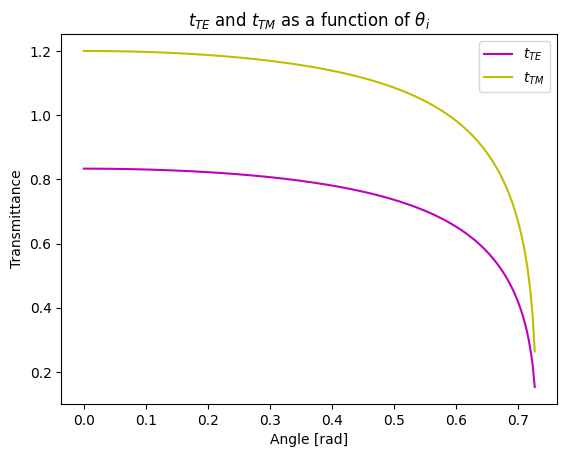

In [47]:
thick_to_thin.plot_transmittance()


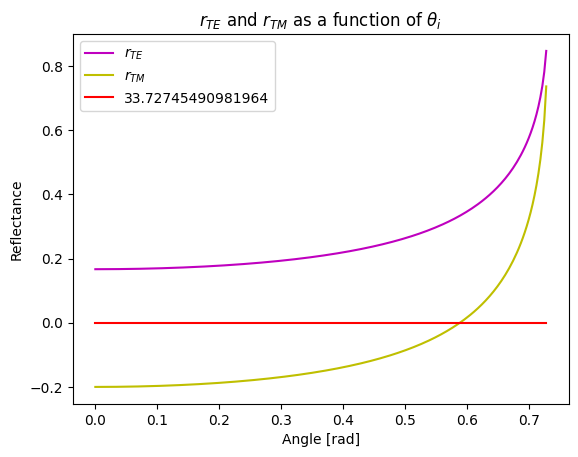

In [48]:
thick_to_thin.plot_reflectance()


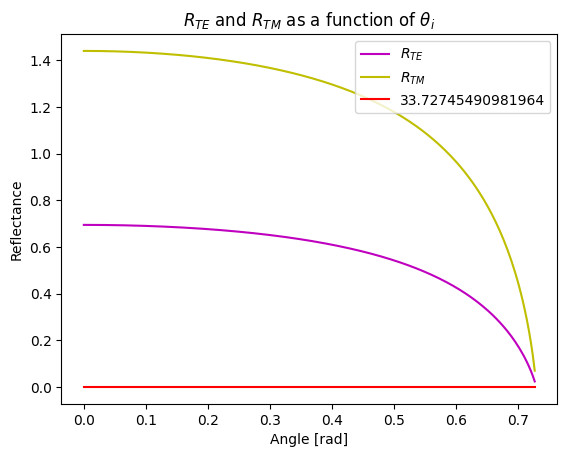

In [49]:
thick_to_thin.Reflectance()


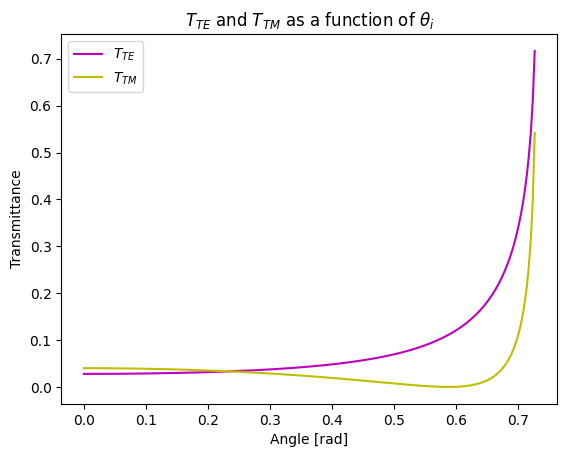

In [45]:
thick_to_thin.Transmittance()

In [51]:
thin_to_thick = Fressnel()
brewster = 58
n_i = 1
#n_t = thick_to_thin.index_finder(brewster)
n_t = 1.5
thin_to_thick.set_n_t(n_t)

thin_to_thick.set_n_i(n_i)
thin_to_thick.transmittance()
thin_to_thick.r_perp()
thin_to_thick.r_parallel()


([(0.2+0j),
  (0.19999867876766877+0j),
  (0.19999471500521265+0j),
  (0.19998810851623813+0j),
  (0.19997885897340337+0j),
  (0.19996696591838817+0j),
  (0.19995242876185332+0j),
  (0.19993524678338676+0j),
  (0.19991541913143956+0j),
  (0.19989294482324835+0j),
  (0.19986782274474738+0j),
  (0.19984005165046784+0j),
  (0.19980963016342568+0j),
  (0.19977655677499764+0j),
  (0.19974082984478497+0j),
  (0.19970244760046557+0j),
  (0.19966140813763475+0j),
  (0.19961770941963256+0j),
  (0.1995713492773607+0j),
  (0.19952232540908652+0j),
  (0.19947063538023524+0j),
  (0.19941627662317069+0j),
  (0.19935924643696257+0j),
  (0.19929954198714336+0j),
  (0.1992371603054515+0j),
  (0.19917209828956378+0j),
  (0.19910435270281449+0j),
  (0.19903392017390278+0j),
  (0.19896079719658777+0j),
  (0.19888498012937117+0j),
  (0.19880646519516762+0j),
  (0.19872524848096274+0j),
  (0.1986413259374585+0j),
  (0.19855469337870618+0j),
  (0.19846534648172698+0j),
  (0.19837328078611988+0j),
  (0.198278

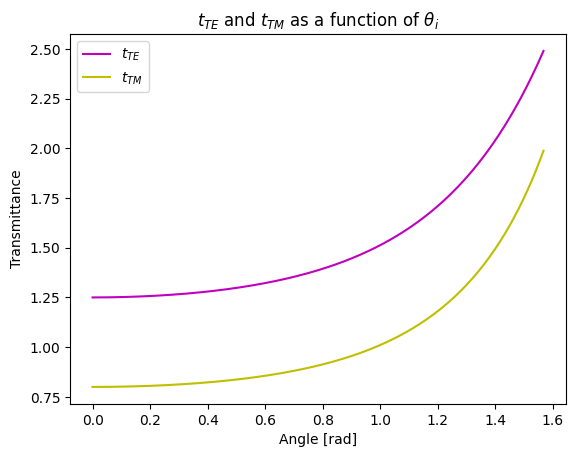

In [52]:
thin_to_thick.plot_transmittance()


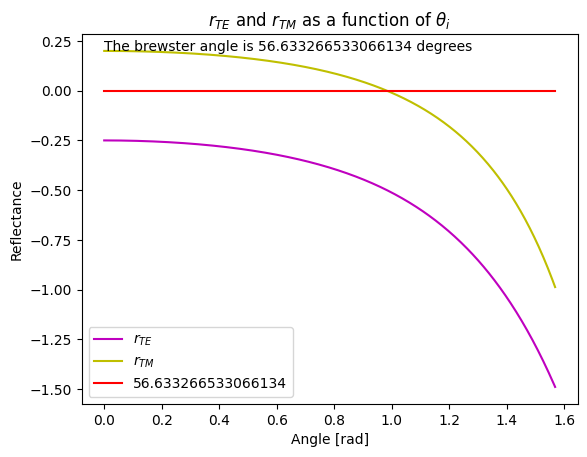

In [53]:
thin_to_thick.plot_reflectance()


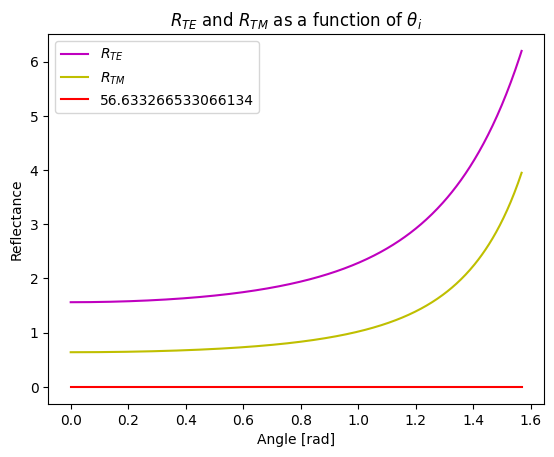

In [54]:
thin_to_thick.Reflectance()


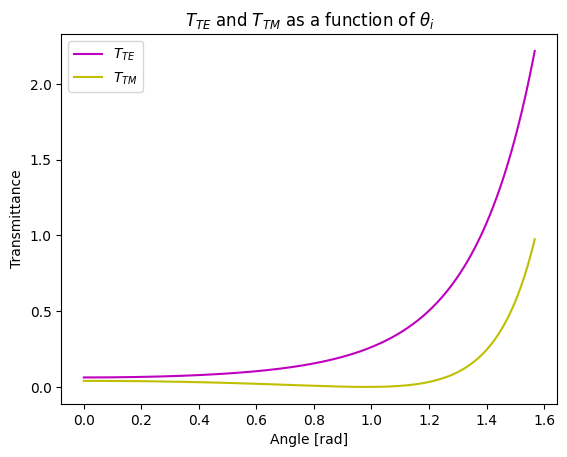

In [55]:
thin_to_thick.Transmittance()

In [56]:
randomList=[]
for i in range(1000):
    r=random.randint(162,203)
    if r not in randomList and r%2 == 0:
        
        randomList.append(r)

arr = []
for i in range(0,91,2):
    arr.append(i)
            

df_random = pd.DataFrame(randomList,columns = ['Rotation Angle'])



df_random['Incident Angle'] = df_random['Rotation Angle'] - 122

#df_random

inc_max = df_random['Incident Angle'].max()
inc_min = df_random['Incident Angle'].min()

shift_min = df_random['Rotation Angle'].min()
shift_max = df_random['Rotation Angle'].max()

brew = 58
shift_brew = brew + 122

print('We are sweeping from ', inc_min, ' to ', inc_max, ' but being shifted by 122 degree, our new range is ', shift_min, ' to ', shift_max)
print('the brewster angle should be at ', brew, ' and the shifted brewster is at ', shift_brew)

print(df_random)

We are sweeping from  40  to  80  but being shifted by 122 degree, our new range is  162  to  202
the brewster angle should be at  58  and the shifted brewster is at  180
    Rotation Angle  Incident Angle
0              176              54
1              198              76
2              172              50
3              166              44
4              192              70
5              174              52
6              184              62
7              186              64
8              170              48
9              162              40
10             168              46
11             164              42
12             190              68
13             188              66
14             194              72
15             196              74
16             202              80
17             182              60
18             180              58
19             200              78
20             178              56


In [57]:
avrg = []
angle = []


for i in range(40,81,2):
    string = str(i) + '.csv'
    df = pd.read_csv(string, sep='delimiter',engine='python')
    df = df[15:26]
    df.columns=['itr']
    lines = []
    for line in df['itr']:
        line = line.split(',')
        lines.append(line)
    df = pd.DataFrame(lines)
    power = df[1]
    power = '0.' + power
    power = power.values.tolist()
    for j in range(0, len(power)):
        power[j] = float(power[j])
    avg = np.mean(power)
    avrg.append(avg)
    angle.append(i)

data_dict = {
    'Angle [degrees]':angle,
    'Average Power [W]':avrg
}


data = pd.DataFrame(data_dict)


print(data.to_string())

    Angle [degrees]  Average Power [W]
0                40       3.894000e-06
1                42       4.889857e-06
2                44       8.415857e-07
3                46       5.814143e-07
4                48       3.895429e-07
5                50       8.717714e-07
6                52       2.867714e-07
7                54       1.133571e-07
8                56       7.514714e-08
9                58       3.860714e-08
10               60       7.851143e-07
11               62       1.233143e-07
12               64       5.101429e-07
13               66       7.353286e-07
14               68       4.309000e-06
15               70       2.044143e-06
16               72       9.676000e-06
17               74       8.876286e-06
18               76       1.048043e-04
19               78       1.660914e-04
20               80       1.741586e-04


Our brewster angle is observed at 58 degrees


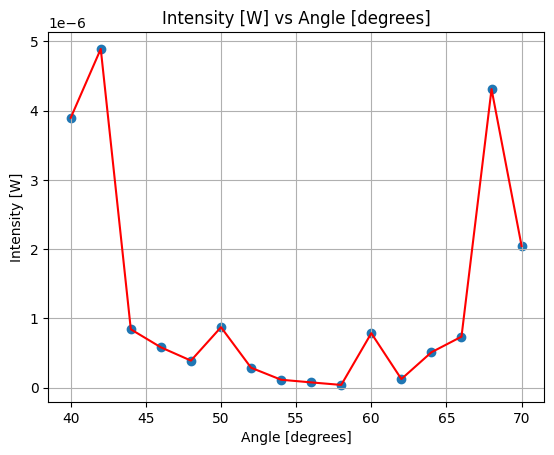

In [58]:
data_angle = data['Angle [degrees]']
data_power = data['Average Power [W]']

data_angle2 = data_angle[0:16]
data_power2 = data_power[0:16]

for i in range(len(data_power2)):
    if data_power2[i] == data_power2.min():
        minimum = data_angle2[i]
        
string = 'Our brewster angle is observed at ' + str(minimum) + ' degrees'
print(string)

plt.scatter(data_angle2,data_power2)
plt.plot(data_angle2,data_power2,color='r')
plt.title('Intensity [W] vs Angle [degrees]')
plt.ylabel('Intensity [W]')
plt.xlabel('Angle [degrees]')
plt.grid()
plt.show()